In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

df1 = pd.read_json('../../data/1089_M-1_A.json').replace(np.nan, 0)
df2 = pd.read_json('../../data/2010_C2-1090_A.json').replace(np.nan, 0)
df = pd.concat([df1, df2])
df

,contestId,index,name,rating,timeLimit,memoryLimit,statement,tags.data structures,tags.greedy,tags.implementation,...,tags.graph matchings,tags.ternary search,tags.*special,tags.chinese remainder theorem,tags.fft,tags.meet-in-the-middle,tags.matrices,tags.2-sat,tags.expression parsing,tags.schedules
0,1089,K,King Kog's Reception,2400.0,2,512,King Kog got annoyed of the usual laxity of hi...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1089,J,JS Minification,3200.0,1,512,International Coding Procedures Company ICPC w...,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1089,I,Interval-Free Permutations,2600.0,1,512,Consider a permutation p1 p2 dots pn of intege...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1089,G,Guest Student,1500.0,1,512,Berland State University invites people from a...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1089,F,Fractions,1900.0,1,512,You are given a positive integer n Find a sequ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,1090,M,The Pleasant Walk,1000.0,1,512,There are n houses along the road where Anya l...,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4970,1090,J,Two Prefixes,2600.0,1,512,Misha didnt do his math homework for todays le...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4971,1090,D,Similar Arrays,1800.0,1,512,Vasya had an array of n integers each element ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4972,1090,C,New Year Presents,2400.0,2,512,Santa has prepared boxes with presents for n k...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Get all columns that start with 'tags.'
tag_columns = [col for col in df.columns if col.startswith('tags.')]
print('tag_columns:', tag_columns)
print('tag_columns count:', len(tag_columns))
# Get the dataframe data in those columns
tags_df = df[tag_columns]
tags_df

tag_columns: ['tags.data structures', 'tags.greedy', 'tags.implementation', 'tags.combinatorics', 'tags.math', 'tags.dp', 'tags.trees', 'tags.bitmasks', 'tags.constructive algorithms', 'tags.interactive', 'tags.sortings', 'tags.brute force', 'tags.strings', 'tags.geometry', 'tags.flows', 'tags.graphs', 'tags.binary search', 'tags.hashing', 'tags.probabilities', 'tags.number theory', 'tags.dsu', 'tags.shortest paths', 'tags.games', 'tags.string suffix structures', 'tags.dfs and similar', 'tags.two pointers', 'tags.divide and conquer', 'tags.graph matchings', 'tags.ternary search', 'tags.*special', 'tags.chinese remainder theorem', 'tags.fft', 'tags.meet-in-the-middle', 'tags.matrices', 'tags.2-sat', 'tags.expression parsing', 'tags.schedules']
tag_columns count: 37


,tags.data structures,tags.greedy,tags.implementation,tags.combinatorics,tags.math,tags.dp,tags.trees,tags.bitmasks,tags.constructive algorithms,tags.interactive,...,tags.graph matchings,tags.ternary search,tags.*special,tags.chinese remainder theorem,tags.fft,tags.meet-in-the-middle,tags.matrices,tags.2-sat,tags.expression parsing,tags.schedules
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4972,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Messure the frequency of each tag and how imbalance the dataset is
print('Tags Frequency:')
tags_freq = df[tag_columns].sum().sort_values(ascending=False)
print(tags_freq)
# Imbalace Ratio
ir = tags_freq.iloc[0]/tags_freq.iloc[-1]
# Coefficient of Variation
cv = tags_freq.std()/tags_freq.mean()
print('\nImbalance Ratio:', ir)
print('Coefficient of Variation:', cv)

Tags Frequency:
tags.math                         2860.0
tags.greedy                       2831.0
tags.implementation               2711.0
tags.dp                           2096.0
tags.data structures              1718.0
tags.constructive algorithms      1718.0
tags.brute force                  1679.0
tags.sortings                     1055.0
tags.binary search                1053.0
tags.graphs                       1044.0
tags.dfs and similar               918.0
tags.trees                         809.0
tags.number theory                 737.0
tags.strings                       725.0
tags.combinatorics                 668.0
tags.bitmasks                      563.0
tags.two pointers                  534.0
tags.*special                      419.0
tags.geometry                      383.0
tags.dsu                           346.0
tags.divide and conquer            288.0
tags.shortest paths                263.0
tags.probabilities                 231.0
tags.games                         226.0


In [4]:
# Define the tags
tags = ['tags.data structures', 'tags.greedy', 'tags.implementation', 'tags.combinatorics', 'tags.math', 
        'tags.dp', 'tags.trees', 'tags.bitmasks', 'tags.constructive algorithms', 'tags.interactive', 
        'tags.sortings', 'tags.brute force', 'tags.strings', 'tags.geometry', 'tags.flows', 'tags.graphs', 
        'tags.binary search', 'tags.hashing', 'tags.probabilities', 'tags.number theory', 'tags.dsu', 
        'tags.shortest paths', 'tags.games', 'tags.string suffix structures', 'tags.dfs and similar', 
        'tags.two pointers', 'tags.divide and conquer', 'tags.graph matchings', 'tags.ternary search', 
        'tags.*special', 'tags.chinese remainder theorem', 'tags.fft', 'tags.meet-in-the-middle', 
        'tags.matrices', 'tags.2-sat', 'tags.expression parsing', 'tags.schedules']

# Create a dictionary dividing them into super categories
super_categories = {
    'implementation': [
        'tags.implementation', 'tags.constructive algorithms'
    ],
    'maths': [
        'tags.math', 'tags.geometry', 'tags.matrices', 'tags.combinatorics', 'tags.probabilities', 
        'tags.number theory', 'tags.chinese remainder theorem', 'tags.fft',
    ],
    'graphs': [
        'tags.trees', 'tags.dsu', 'tags.shortest paths', 'tags.data structures',
        'tags.dfs and similar', 'tags.flows', 'tags.graphs', 'tags.graph matchings',
    ],
    'optimization': [
        'tags.greedy', 'tags.dp', 'tags.two pointers', 'tags.sortings', 'tags.brute force', 
        'tags.binary search', 'tags.divide and conquer', 'tags.meet-in-the-middle', 
    ],
    'special-strings': [
        'tags.*special', 'tags.2-sat', 'tags.ternary search', 'tags.schedules', 'tags.games', 
        'tags.bitmasks', 'tags.interactive', 'tags.strings', 'tags.string suffix structures', 
        'tags.hashing', 'tags.expression parsing',
    ]
}

In [5]:
supertag_columns = [f'supertag.{key}' for key in super_categories]
for key in supertag_columns:
    df[key] = df[super_categories[key.split('.')[1]]].any(axis=1)
df[supertag_columns] = df[supertag_columns].astype(int)
df[supertag_columns]

,supertag.implementation,supertag.maths,supertag.graphs,supertag.optimization,supertag.special-strings
0,0,0,1,0,0
1,1,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
4969,1,0,0,0,0
4970,0,0,0,0,1
4971,1,0,0,0,0
4972,1,0,1,0,0


In [6]:
# Messure the frequency of each tag and how imbalance the dataset is
print('SuperTags Frequency:')
sup_freq = df[supertag_columns].sum()
supertags_freq = sup_freq.sort_values(ascending=False)
print(supertags_freq)
# Imbalace Ratio
ir = supertags_freq.iloc[0]/supertags_freq.iloc[-1]
# Coefficient of Variation
cv = supertags_freq.std()/supertags_freq.mean()
print('\nImbalance Ratio:', ir)
print('Coefficient of Variation:', cv)

SuperTags Frequency:
supertag.optimization       6204
supertag.implementation     4025
supertag.maths              3655
supertag.graphs             3221
supertag.special-strings    2240
dtype: int64

Imbalance Ratio: 2.7696428571428573
Coefficient of Variation: 0.3788933669252212


In [7]:
y_data = df[supertag_columns].values
y_data.shape

(9553, 5)

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

wordbag = set()
statements = df['statement'].apply(str.lower)

stop_words = set(stopwords.words('english'))
latex = ['rho', 'cot', 'kappa', 'mod', 'leftrightarrow', 'gg', 'ast', 'sqcap', 'star', 'rightharpoonup', 'angle', 'equiv', 'Sigma', 'cos', 'flat', 'Leftrightarrow', 'because', 'mu', 'zeta', 'Omega', 'chi', 'leftarrow', 'bigwedge', 'Uparrow', 'imath', 'inf', 'gamma', 'partial', 'triangleright', 'rightsquigarrow', 'exp', 'Xi', 'sinh', 'neq', 'sec', 'Theta', 'diamond', 'bigtriangleright', 'omega', 'cap', 'bot', 'bigcup', 'oslash', 'arg', 'biguplus', 'succ', 'argmax', 'eta', 'simeq', 'Box', 'circle', 'sup', 'odot', 'lozenge', 'geq', 'diamondsuit', 'Lambda', 'top', 'Re', 'coprod', 'sum', 'oint', 'min', 'Im', 'omicron', 'notin', 'otimes', 'hookrightarrow', 'natural', 'owns', 'dashv', 'prod', 'subset', 'Updownarrow', 'Rightarrowtail', 'alpha', 'Leftarrow', 'le', 'amalg', 'nparallel', 'clubsuit', 'longmapsto', 'spadesuit', 'land', 'delta', 'Delta', 'hookleftarrow', 'csc', 'nsubseteq', 'infty', 'vee', 'int', 'sim', 'circ', 'bullet', 'succeq', 'nexists', 'epsilon', 'longleftarrow', 'models', 'lambda', 'updownarrow', 'dagger', 'pi', 'asymp', 'phi', 'lim', 'triangleleft', 'leq', 'longrightarrow', 'neg', 'supset', 'leftharpoonup', 'bigcap', 'rightharpoondown', 'square', 'sphericalangle', 'Upsilon', 'Pi', 'downarrow', 'parallel', 'lor', 'dim', 'beth', 'times', 'gimel', 'jmath', 'oplus', 'bigtriangledown', 'Rightarrow', 'iota', 'tan', 'Longleftarrow', 'll', 'leftharpoondown', 'bigtriangleleft', 'wp', 'smallsetminus', 'prec', 'xi', 'longleftrightarrow', 'bigtriangleup', 'ge', 'approx', 'sharp', 'ell', 'argmin', 'triangle', 'uplus', 'dashrightarrow', 'log', 'max', 'psi', 'mp', 'cosh', 'tanh', 'cup', 'subseteq', 'daleth', 'theta', 'supsetneq', 'rightarrow', 'leadsto', 'setminus', 'leftrightsquigarrow', 'Longrightarrow', 'degree', 'deg', 'preceq', 'bigsqcup', 'perp', 'ddagger', 'ln', 'Psi', 'det', 'surd', 'Phi', 'in', 'forall', 'subsetneq', 'blacksquare', 'nsupseteq', 'ni', 'tau', 'upsilon', 'cdot', 'measuredangle', 'bigcirc', 'div', 'lnot', 'uparrow', 'sin', 'propto', 'therefore', 'triangleq', 'sigma', 'heartsuit', 'exists', 'supseteq', 'Gamma', 'backslash', 'wedge', 'lcm', 'aleph', 'ominus', 'hbar', 'Downarrow', 'nu', 'mapsto', 'gcd', 'Diamond', 'sqcup', 'beta', 'bigvee', 'cong', 'vdash', 'mid', 'Longleftrightarrow', 'nabla', 'pm']

tokens = [[word for word in word_tokenize(st) if word not in stop_words and word not in latex] for st in statements]

for st_tok in tokens:
    wordbag.update(set(st_tok))
len(wordbag)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


32164

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

idx2word = {i + 1: word for i, word in enumerate(wordbag)}
word2idx = {word: i + 1 for i, word in enumerate(wordbag)}

x_tokens = [[word2idx[word] for word in st_tok] for st_tok in tokens]

x_tokens = pad_sequences(x_tokens, padding='post')
x_tokens

array([[ 5775, 25217, 15720, ...,     0,     0,     0],
       [ 8452, 27993, 31910, ...,     0,     0,     0],
       [24669, 26573,  4938, ...,     0,     0,     0],
       ...,
       [13282, 27075, 19356, ...,     0,     0,     0],
       [15600, 14571,  8392, ...,     0,     0,     0],
       [24686,  1732, 19356, ...,     0,     0,     0]])

In [10]:
x_tokens.shape

(9553, 766)

In [15]:
from gensim.models import Word2Vec
emb_size=128
cbow_model = Word2Vec.load(f'../models/cbow_{emb_size}.model')
sg_model = Word2Vec.load(f'../models/sg_{emb_size}.model')
def get_embedding_matrix(x_tokens, w2vModel):
    new_x_data = []
    for row in x_tokens:
        new_row = []
        for word in row:
            new_row.append(w2vModel.wv[idx2word[word]] if word != 0 and (idx2word[word] in w2vModel.wv) else np.zeros(emb_size))
        new_x_data.append(new_row)
    return np.array(new_x_data)

In [16]:
class_weights = len(df) / (len(sup_freq) * sup_freq)
class_weights.values

array([0.47468323, 0.52273598, 0.59316982, 0.3079626 , 0.85294643])

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tokens, y_data, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7642, 766), (7642, 5), (1911, 766), (1911, 5))

In [30]:
useSG = False
x_train = get_embedding_matrix(x_train, sg_model if useSG else cbow_model)
x_test = get_embedding_matrix(x_test, sg_model if useSG else cbow_model)

In [31]:
def weighted_binary_crossentropy(class_weights):
    def loss_fn(y_true, y_pred):
        # Calculate binary cross-entropy
        bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        
        # Apply class weights
        weighted_bce = bce * class_weights
        return tf.reduce_mean(weighted_bce)
    
    return loss_fn

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, AveragePooling1D

output_size = y_train.shape[1]

model = Sequential()
# if not word2vec:
#     model.add(Embedding(len(wordbag)+1, embedding_size, input_shape=(x_train.shape[1],)))
model.add(Conv1D(32, 5, strides=2, activation='relu', padding='same', input_shape=x_train.shape[1:]))
# model.add(MaxPooling1D(5))
model.add (AveragePooling1D(5))
# model.add(Conv1D(16, 5, strides=1, activation='relu', padding='same', input_shape=x_train.shape[1:]))
# model.add(MaxPooling1D(5))
# model.add(Bidirectional(LSTM(256, recurrent_dropout=0.5, return_sequences=True)))
# model.add(Dropout(0.5))
# model.add(Conv1D(16, 5, activation='relu', padding='same'))
# model.add(MaxPooling1D(5))
# model.add(Bidirectional(LSTM(128, recurrent_dropout=0.5, return_sequences=True)))
# model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.5, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.5)))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(output_size, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam', metrics=['binary_accuracy', 'f1_score'])
model.compile(loss=weighted_binary_crossentropy(class_weights.values),
              optimizer='adam', metrics=['binary_accuracy', 'f1_score'])
model.summary()

c:\Users\enriq\Documents\MyDocuments\University\S8\RedesNeuronales\finalProject\cp-problem-classifier\workspace\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 383, 32)        │        16,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_1             │ (None, 76, 32)         │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 76, 128)        │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 76, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,805 (659.39 KB)

 Trainable params: 168,805 (659.39 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_binary_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_binary_accuracy', patience=5, mode='max', restore_best_weights=True)

In [34]:
history=model.fit(x_train,y_train,epochs=50, batch_size=32, verbose=2, validation_data=(x_test, y_test),
                  callbacks=[checkpoint, early_stopping])

Epoch 1/50
239/239 - 45s - 188ms/step - binary_accuracy: 0.6561 - f1_score: 0.3171 - loss: 0.3300 - val_binary_accuracy: 0.6950 - val_f1_score: 0.3225 - val_loss: 0.3048
Epoch 2/50
239/239 - 28s - 116ms/step - binary_accuracy: 0.6932 - f1_score: 0.3854 - loss: 0.3090 - val_binary_accuracy: 0.7253 - val_f1_score: 0.4298 - val_loss: 0.2881
Epoch 3/50
239/239 - 27s - 113ms/step - binary_accuracy: 0.7076 - f1_score: 0.4215 - loss: 0.2989 - val_binary_accuracy: 0.7284 - val_f1_score: 0.3887 - val_loss: 0.2852
Epoch 4/50
239/239 - 27s - 112ms/step - binary_accuracy: 0.7163 - f1_score: 0.4345 - loss: 0.2938 - val_binary_accuracy: 0.7309 - val_f1_score: 0.4632 - val_loss: 0.2795
Epoch 5/50
239/239 - 27s - 113ms/step - binary_accuracy: 0.7228 - f1_score: 0.4529 - loss: 0.2879 - val_binary_accuracy: 0.7345 - val_f1_score: 0.4868 - val_loss: 0.2798
Epoch 6/50
239/239 - 28s - 116ms/step - binary_accuracy: 0.7300 - f1_score: 0.4664 - loss: 0.2840 - val_binary_accuracy: 0.7249 - val_f1_score: 0.4411

Total epochs: 50
Real epochs: 17


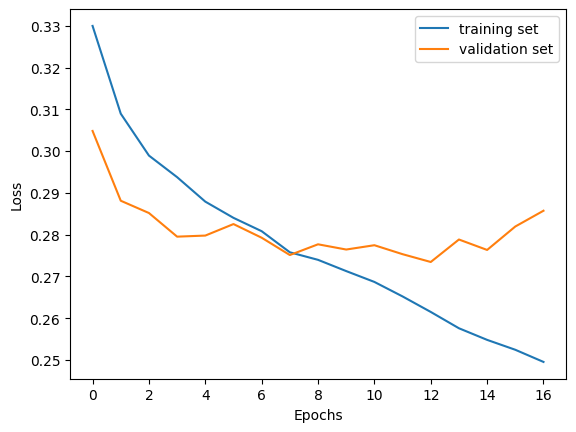

In [35]:
import matplotlib.pyplot as plt

total_epochs = history.params['epochs']
real_epochs = len(history.history['loss'])

print('Total epochs:', total_epochs)
print('Real epochs:', real_epochs)

x_epochs = [i for i in range(real_epochs)]
plt.plot(x_epochs, history.history['loss'], x_epochs, history.history['val_loss'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

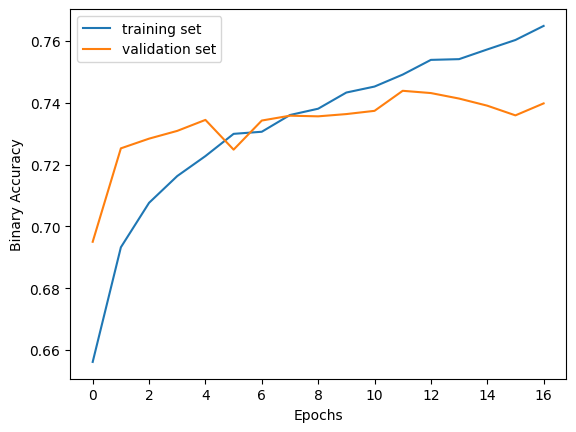

In [36]:
x_epochs = [i for i in range(real_epochs)]
plt.plot(x_epochs, history.history['binary_accuracy'], x_epochs, history.history['val_binary_accuracy'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.show()

In [37]:
loss, binary_accuracy, f1_score = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Binary Accuracy:', binary_accuracy)
print('F1 Score:', f1_score)

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - binary_accuracy: 0.7412 - f1_score: 0.5175 - loss: 0.2774
Loss: 0.2753358781337738
Binary Accuracy: 0.743903636932373
F1 Score: tf.Tensor([0.35057467 0.53671795 0.5505984  0.55441475 0.5989304 ], shape=(5,), dtype=float32)


In [38]:
x_test.shape

(1911, 766, 100)

In [39]:
y_test_pred = model.predict(x_test)
y_test_pred[1], y_test[1]

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step


(array([0.50231135, 0.18217862, 0.12762414, 0.62926364, 0.77151144],
       dtype=float32),
 array([1, 0, 0, 1, 1]))